In [1]:
import numpy as np
import clima_anom as ca

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [25]:
data_dir = '/mnt/Data/Data/GLM/SA/Grid/GLM_2018_03_15min_05x05.nc'
data = ca.read_netcdf(data_dir,2)
lat = data['lat']
lon = data['lon']
tim = data['time']
flash = data['flash']

lon2d, lat2d = np.meshgrid(lon, lat)

flash_sum = np.sum(flash,axis=0)
flash_mean = np.mean(flash,axis=0)

lat : (110,)
lon : (110,)
time : (2976,)
flash : (2976, 110, 110)


/home/arturo/anaconda3/envs/AXE/lib/python3.9/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


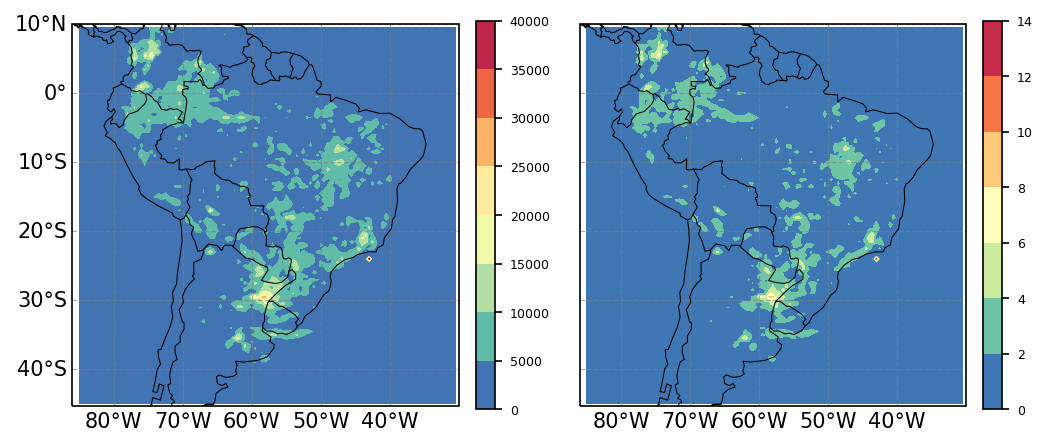

In [24]:
levels = np.arange(2,13,1)
levels = None
cmap = plt.cm.Spectral_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,4),dpi=150)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-86,-30,-42,9])
a1 = ax1.contourf(lon2d,lat2d,flash_sum,cmap=cmap,levels=levels)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
cbar1 = plt.colorbar(a1,fraction=0.046, pad=0.04)
cbar1.ax.tick_params(labelsize=6)

ax2 = plt.subplot(gs[0, 1], projection = proj)
ax2.coastlines()
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax2.set_extent([-86,-30,-42,9])
a2 = ax2.contourf(lon2d,lat2d,flash_mean,cmap=cmap,levels=levels)
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
cbar2 = plt.colorbar(a2,fraction=0.046, pad=0.04)
cbar2.ax.tick_params(labelsize=6)


In [ ]:
def flash_hour_interval(data_in):
    salida = []

In [41]:
test = []
for t in range(len(tim)):
    if tim[t].hour >= 18 and tim[t].hour <= 20:
        test.append(flash[t,:,:].data)

In [45]:
flash_18_20 = np.zeros([len(test),110,110])
for t in range(len(test)):
    flash_18_20[t] = test[t]

flash_18_20_mean = np.mean(flash_18_20,axis=0)

/home/arturo/anaconda3/envs/AXE/lib/python3.9/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


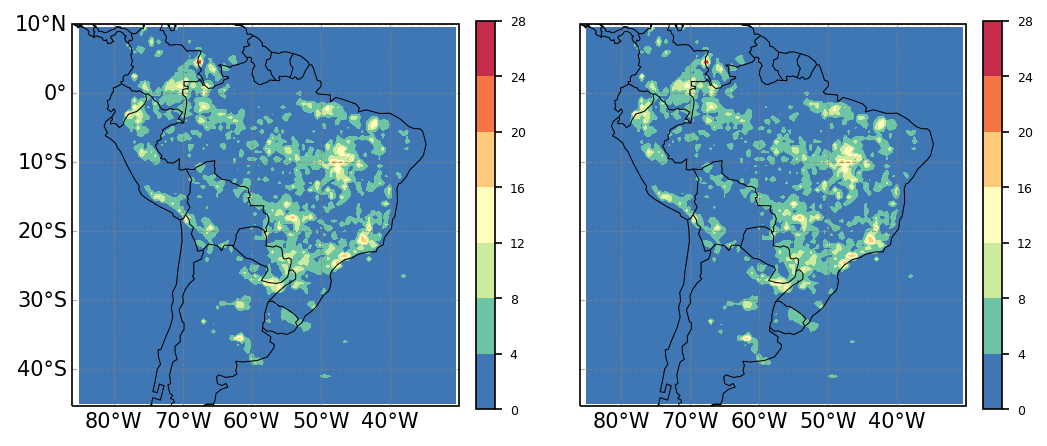

In [46]:
levels = None
cmap = plt.cm.Spectral_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,4),dpi=150)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-86,-30,-42,9])
a1 = ax1.contourf(lon2d,lat2d,flash_18_20_mean,cmap=cmap,levels=levels)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
cbar1 = plt.colorbar(a1,fraction=0.046, pad=0.04)
cbar1.ax.tick_params(labelsize=6)

ax2 = plt.subplot(gs[0, 1], projection = proj)
ax2.coastlines()
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax2.set_extent([-86,-30,-42,9])
a2 = ax2.contourf(lon2d,lat2d,flash_18_20_mean,cmap=cmap,levels=levels)
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
cbar2 = plt.colorbar(a2,fraction=0.046, pad=0.04)
cbar2.ax.tick_params(labelsize=6)
